In [ ]:
import numpy as np

# Manually construct the Vandermonde matrix
def vandermode_matrix(t, degree):
    n = len(t)
    V = np.zeros((n, degree + 1))
    for i in range(n):
        for j in range(degree + 1):
            V[i, j] = t[i] ** (degree - j)
    return V

def lstsq(V, y):
    # Compute V^T V and V^T y
    V_T_V = np.dot(V.T, V)
    V_T_y = np.dot(V.T, y)
    
    # Solve the normal equations V^T V * coeffs = V^T y
    # Use np.linalg.solve to solve the linear system
    coeffs = np.linalg.solve(V_T_V, V_T_y)
    return coeffs

# Implement zeroth-degree (nearest neighbor) interpolation
def interp0(y_samples, t_samples, t_fine):
    value = 0
    for i in range(1, t_samples.shape[0]):
        if t_fine >= t_samples[i - 1] and t_fine < t_samples[i]:
            value = y_samples[i - 1]
    
    return value

# Implement first-degree (linear) interpolation
def interp1(y_samples, t_samples, t):
    t = np.asarray(t)
    indices = np.searchsorted(t_samples, t, side='left') - 1
    indices = np.clip(indices, 0, len(t_samples)-2)
    t0 = t_samples[indices]
    t1 = t_samples[indices+1]
    y0 = y_samples[indices]
    y1 = y_samples[indices+1]
    return y0 + (y1 - y0) * (t - t0) / (t1 - t0)

# Implement second-degree interpolation by fitting a quadratic polynomial
def interp2(y_samples, t_samples, t):
    coeffs2 = np.polyfit(t_samples, y_samples, 2)
    return np.polyval(coeffs2, t)

# Implement third-degree interpolation by fitting a cubic polynomial
def interp3(y_samples, t_samples, t):
    coeffs3 = np.polyfit(t_samples, y_samples, 3)
    return np.polyval(coeffs3, t)

def approximation(y_samples, t_samples, t_fine):
    # Evaluate the interpolations on the fine grid
    y_interp0 = interp0(y_samples, t_samples, t_fine)
    y_interp1 = interp1(y_samples, t_samples, t_fine)
    y_interp2 = interp2(y_samples, t_samples, t_fine)
    y_interp3 = interp3(y_samples, t_samples, t_fine)
    
    return y_interp0, y_interp1, y_interp2, y_interp3

Integral of original function: 0.000037
Integral of zeroth-degree interpolation: -0.004337, Error: 0.004374
Integral of first-degree interpolation: 0.000049, Error: 0.000011
Integral of second-degree interpolation: 0.062028, Error: 0.061990
Integral of third-degree interpolation: 0.062028, Error: 0.061990


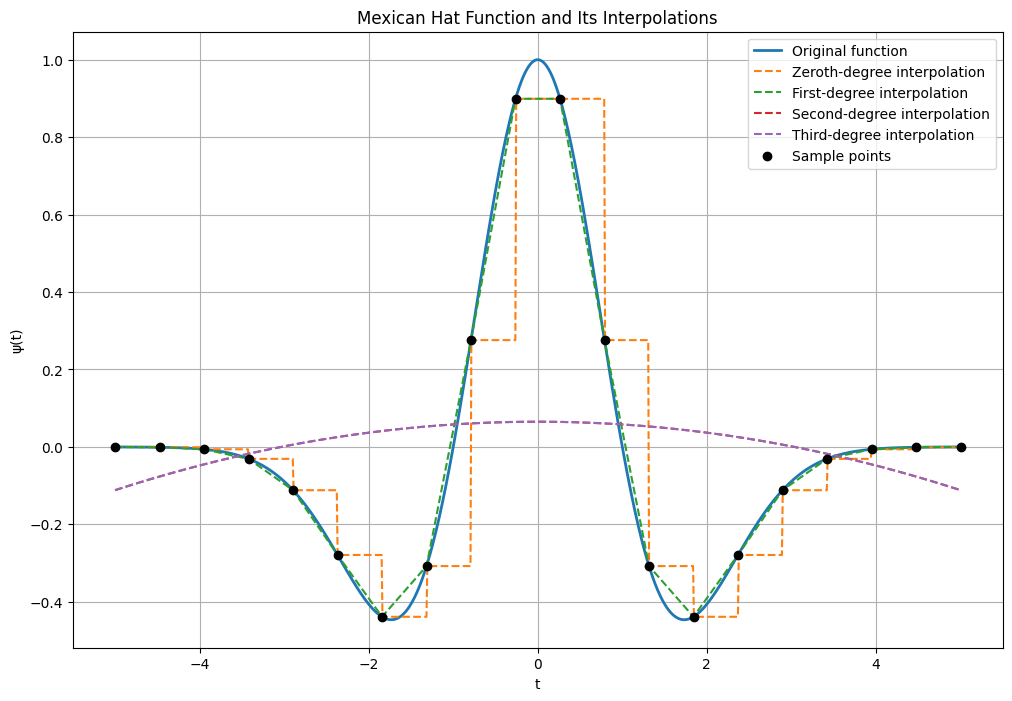

In [2]:
%matplotlib inline

import time
import matplotlib.pyplot as plt

# Define the Mexican hat function
def mexican_hat(t):
    return (1 - t**2) * np.exp(-t**2 / 2)

# Define the range and number of sample points
t_min = -5
t_max = 5

# Define a fine grid for plotting and integration
t_fine = np.linspace(t_min, t_max, 1000)
y_original = mexican_hat(t_fine)

num_samples = 20
t_samples = np.linspace(t_min, t_max, num_samples)
y_samples = mexican_hat(t_samples)

# Integrate the original function using the trapezoidal rule
integral_original = np.trapezoid(y_original, t_fine)
print(f"Integral of original function: {integral_original:.6f}")

y_interp0, y_interp1, y_interp2, y_interp3 = approximation(y_samples, t_samples, t_fine)

# Integrate each interpolated function using the trapezoidal rule
integral_interp0 = np.trapezoid(y_interp0, t_fine)
integral_interp1 = np.trapezoid(y_interp1, t_fine)
integral_interp2 = np.trapezoid(y_interp2, t_fine)
integral_interp3 = np.trapezoid(y_interp3, t_fine)

# Calculate errors
error0 = abs(integral_original - integral_interp0)
error1 = abs(integral_original - integral_interp1)
error2 = abs(integral_original - integral_interp2)
error3 = abs(integral_original - integral_interp3)

print(f"Integral of zeroth-degree interpolation: {integral_interp0:.6f}, Error: {error0:.6f}")
print(f"Integral of first-degree interpolation: {integral_interp1:.6f}, Error: {error1:.6f}")
print(f"Integral of second-degree interpolation: {integral_interp2:.6f}, Error: {error2:.6f}")
print(f"Integral of third-degree interpolation: {integral_interp3:.6f}, Error: {error3:.6f}")

# Plot the original function, samples, and the interpolations
plt.figure(figsize=(12, 8))
plt.plot(t_fine, y_original, label='Original function', linewidth=2)
plt.plot(t_fine, y_interp0, label='Zeroth-degree interpolation', linestyle='--')
plt.plot(t_fine, y_interp1, label='First-degree interpolation', linestyle='--')
plt.plot(t_fine, y_interp2, label='Second-degree interpolation', linestyle='--')
plt.plot(t_fine, y_interp3, label='Third-degree interpolation', linestyle='--')
plt.scatter(t_samples, y_samples, color='black', zorder=5, label='Sample points')
plt.legend()
plt.title('Mexican Hat Function and Its Interpolations')
plt.xlabel('t')
plt.ylabel('ψ(t)')
plt.grid(True)
plt.show()